In [ ]:
# Dependencias - EJECUTA ESTA CELDA ANTES DE COMENZAR

# El paquete nnfs incluye la base de datos de entrenamiento que vamos a usar, y asegura que las semillas de los métodos random son consistentes, para que nuestros resultados sean comparables
#%pip install -q nnfs
#%pip install -q numpy matplotlib

import nnfs
import matplotlib.pyplot as plt
import numpy as np

nnfs.init()

# Esta función la usaremos más adelante para ver los resultados de la red
# works only for model = model = [dense1, activation1, dense2, loss_activation]

def plot_prediction_performance_spiral(
        model: list | tuple,
        X, y,
        num_points: int = 100,
        ) -> None:
    """Plots the performance of the model in the spiral dataset with 3 categories"""

    def probabilities_to_rgb(probabilities_array):
        """ Maps an array of probabilities to RGB colors."""

        # Ensure that probabilities sum up to 1 for all data points
        if not np.all(np.isclose(np.sum(probabilities_array, axis=1), 1.0)):
            raise ValueError("Probabilities must sum up to 1 for all data points.")

        # Map probabilities to RGB channels (0-255) for all data points
        r, g, b = (probabilities_array * 255).astype(int).T

        # Return the RGB colors as a NumPy array
        return np.column_stack((r, g, b))

    # Create a meshgrid of points in the (-1,1)x(-1,1) space
    x_val = np.linspace(-1, 1, num_points)
    y_val = np.linspace(-1, 1, num_points)

    x_grid, y_grid = np.meshgrid(x_val, y_val)

    # Flatten the grids into 1D arrays
    x_flat = x_grid.flatten()
    y_flat = y_grid.flatten()

    # Combine the flattened arrays into an Nx2 array
    XX_tuples = np.column_stack((x_flat, y_flat))

    # Perform a forward pass through the network
    input = XX_tuples
    for layer in model[:-1]:
        layer.forward(input)
        input = layer.output

    # Assumed last layer is a softmax activation + loss function
    # 'y_true' here is random since it will not be used
    # (only the output of the softmax is needed)
    model[-1].forward(input, y_true=np.array([0]*len(model[-2].output)))

    probabilities_array = model[-1].output
    rgb_colors = probabilities_to_rgb(probabilities_array)
    probs_2d = rgb_colors.reshape(num_points, num_points,3)

    # Assumed 3 categories - change this if different
    colors = ['r' if label == 0 else 'g' if label == 1 else 'b' for label in y]

    plt.imshow(probs_2d, extent=(-1, 1, -1, 1), interpolation='bilinear')
    plt.scatter(X[:, 0], -X[:, 1], c = colors)
    #plt.axis('off')  # Turn off axis labels and ticks
    plt.show()# print(rgb_colors)  # This will print the RGB color array
    # plt.pcolor(xx, yy, rgb_colors)
    # plt.show()


## Ejercicio 1: Una neurona simple

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=neurona_simple.png&t=04gzB6Klm7RQkH6&scalingup=0" width="250"/>
</div>
</center>

Calcula el output de una neurona simple con cuatro inputs: $[1.0, 2.0, 3.0, 2.5]$, donde los correspondientes pesos son $[0.2, 0.8, -0.5, 1.0]$, y el sesgo es $2.0$.

In [ ]:
# SOL EJ 1
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] +
          inputs[3] * weights[3] + bias
          )

print(output)

4.8


## Ejercicio 2: Una capa de neuronas

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple.png&t=IvPdbEiQJ9gFVxo&scalingup=0" width="250"/>
</div>
</center>

Calcula la salida de una capa de neuronas con cuatro entradas ($[1, 2, 3, 2.5]$) y tres neuronas:
 - Neurona 1: Pesos = $[0.2, 0.8, -0.5, 1]$, Sesgo = $2$
 - Neurona 2: Pesos = $[0.5, -0.91, 0.26, -0.5]$, Sesgo = $3$
 - Neurona 3: Pesos = $[-0.26, -0.27, 0.17, 0.87]$, Sesgo = $0.5$
  
Calcula la salida directamente sobre una lista, calculando para cada elemento las operaciones necesarias entre inputs, pesos y sesgos.


In [ ]:
# SOL EJ 2
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2.0
bias2 = 3.0
bias3 = 0.5

output = [
    # neurona 1
    inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
    inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
    inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3,
]

print(output)

[4.8, 1.21, 2.385]


# Ejercicio 3: Una capa de neuronas - generalización

Repite el ejercicio 2, pero utiliza un enfoque más general que permita realizar las mismas operaciones por neuronas de forma secuencial (utiliza un bucle ```for```). El formato de datos de entrada ahora es el siguiente:

In [ ]:
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

In [ ]:
# SOL EJ 3
output = []

for neuron_weights, neuron_bias in zip(weights, biases):
  neuron_output = 0

  for n_input, weight in zip(inputs, neuron_weights):
    neuron_output += (n_input * weight)

  neuron_output += neuron_bias

  output.append(neuron_output)

print(output)

[4.8, 1.21, 2.385]


# Ejercicio 4: Prueba de eficiencia

Copia tu solución anterior, pero ahora utiliza un tamaño creciente de los datos de entrada: $n = [5, 50, 500, 5000]$. Genera listas del tamaño apropiado para los inputs, pesos y sesgos que contengan números aleatorios entre $1$ y $3$ para las entradas y sesgos y entre $-1$ y $1$ para los pesos. Supón distribuciones uniformes. Observa el rendimiento de tu implementación cuando $n$ crece.

In [ ]:
# SOL EJ 4 - Code to generate neural network outputs

import numpy as np
import random

# Define different sizes for the input data
n = [5, 50, 500, 5000]

# Loop through different input sizes
for i in n:
    # Generate random input values within a range
    inputs = np.random.uniform(1, 3, (i,))

    # Generate random weights for each neuron in the network
    weights = np.random.uniform(-1, 1, (3, i))

    # Generate random biases for each neuron in the network
    biases = np.random.uniform(1, 3, (i,)).tolist()

    # Initialize an empty list to store the output values
    output = []

    # Iterate through each neuron's weights and biases
    for neuron_weights, neuron_bias in zip(weights, biases):
        neuron_output = 0

        # Calculate the weighted sum of inputs and weights for each neuron
        for n_input, weight in zip(inputs, neuron_weights):
            neuron_output += (n_input * weight)

        # Add the bias for the neuron
        neuron_output += neuron_bias

        # Store the neuron's output in the output list
        output.append(neuron_output)

    # Print the outputs for this set of inputs
    print(output)


[6.501312269321404, 4.456713828510015, 1.855582421348706]
[1.934711811293621, 2.7941721070816135, -2.4589181961049316]
[14.81828342081476, 44.19778155620925, -8.487249555530548]
[-93.14122113406533, -110.68511081361414, 108.00353153982505]


## Ejercicio 5: Una neurona simple usando ```numpy```

Reimplementa el ejercicio 1 usando el paquete ```numpy```


In [ ]:
# SOL EJ 5

import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2.0

output = np.dot(inputs, weights) + bias

print(output)

4.799999952316284


## Ejercicio 6: Una capa de neuronas usando ```numpy```

Reimplementa el ejercicio 2 usando el paquete ```numpy```.


In [ ]:
import numpy as np

# Define input values, weights, and biases for a neural network
inputs = np.array([1.0, 2.0, 3.0, 2.5])

# Weights representing connections between neurons in the network
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

# Biases for each neuron in the network
biases = np.array([2.0, 3.0, 0.5])


In [ ]:
# SOL EJ 6: Calculate the output of the neural network using matrix multiplication
# Dot product of inputs and the transposed weights, then adding the biases
output = np.dot(inputs, weights.T) + biases.T

# Print the output of the neural network
print(output)

[4.79999995 1.21000004 2.38499999]


## Ejercicio 7: Una capa de neuronas con datos en *batch*

Implementa el *forward pass* de una neurona simple asumiendo que la entrada son datos en lote (*batch*). Es decir, la entrada ahora será una matriz, donde cada fila corresponderá a una observación. Por tanto, la salida también será de dimensión 2. Considera los datos dados a continuación:

In [ ]:
import numpy as np

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
         [0.5, -0.91, 0.26, -0.5],
         [-0.26, -0.27, 0.17, 0.87]])
bias = np.array([2.0, 3.0, 0.5])

In [ ]:
# SOL EJ 7
output = np.dot(inputs, weights.T) + biases.T

print(output)

[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]


## Ejercicio 8: Red neuronal con una *hidden layer*

Implementa el *forward pass* de una red con la siguiente arquitectura: una capa de entrada (4 inputs), una hidden layer de 3 neuronas y una capa de salida también con 3 neuronas. Utiliza los datos dados a continuación:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=red_simple.png&t=IkHbjPoTjUPoGWt&scalingup=0" width="250"/>
</div>
</center>



In [ ]:
import numpy as np  # Importing the NumPy library for numerical operations

# Input data - a 3x4 matrix with three samples and four features each
inputs = np.array([
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
])

# Weights for the first layer - a 3x4 matrix representing connections to the neurons in the first layer
weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

# Biases for the neurons in the first layer
biases = np.array([2, 3, 0.5])

# Weights for the second layer - a 3x3 matrix representing connections between layers
weights2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
])

# Biases for the neurons in the second layer
biases2 = np.array([-1, 2, -0.5])


In [ ]:
# SOL EJ 8 - Applying the weights and biases to the input data to compute the output

# Calculating the activations of the neurons in the first layer by performing dot product of inputs and transposed weights,
# then adding the biases for each neuron in the first layer
layer_1 = np.dot(inputs, weights.T) + biases.T

# Calculating the final output by performing dot product of the first layer activations and transposed weights of the second layer,
# then adding the biases for each neuron in the second layer
output = np.dot(layer_1, weights2.T) + biases2.T

# Displaying the computed output of the neural network
print(output)


[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]


## Ejercicio 9: Capa de neuronas usando Programación Orientada a Objetos

Crea una clase llamada ```Layer_Dense```, cuyos parámetros de entrada sean ```n_inputs``` (número de inputs a la capa) y ```n_neurons``` (número de neuronas que contiene la capa). Además, en su constructor deben inicializarse dos variables:
 - ```self.weights```: una matriz que contenga los pesos. Deben inicializarse en números aleatorios entre 0 y 0.01.
 - ```self.biases```: un vector columna que contenga los sesgos. Deben inicializarse en $0$.

Implementa un único método llamado ```forward(self, inputs)``` que, dados unos inputs a la capa, realice el *forward pass*. El resultado debe almacenarse en una variable de la clase
self.output.

In [ ]:
#SOL EJ 9
class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
      self.output = np.dot(inputs, self.weights) + self.biases

In [ ]:
0.01 * np.random.rand(1, 1)

array([[0.001222]])

In [ ]:
dense1 = Layer_Dense(4, 3)

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])


dense1.forward(inputs)

print(dense1.output)


[[0.04775371 0.05069533 0.04320803]
 [0.05909407 0.03156976 0.04694154]
 [0.0146669  0.01521253 0.00159172]]


## Ejercicio 10: *Forward pass* de datos de entrenamiento — Triple espiral

A continuación se describe un problema de clasificación con tres categorías. La base de datos mostrada abajo ha sido generada a partir de la ecuación de 3 espirales distintas, añadiendo ruido. Se trata de un problema complejo por su alta no-linealidad. Observa toda la base de datos:

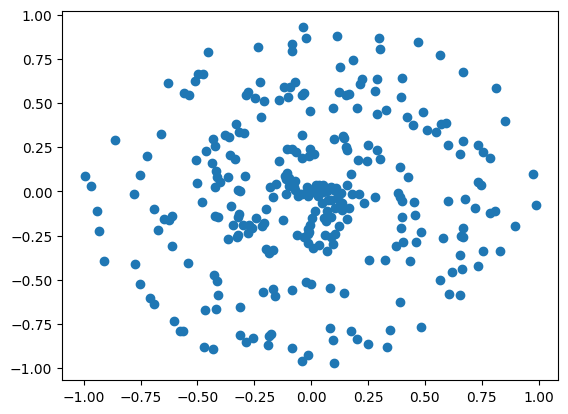

In [ ]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Resaltando por colores cada categoría se aprecia mejor su naturaleza:

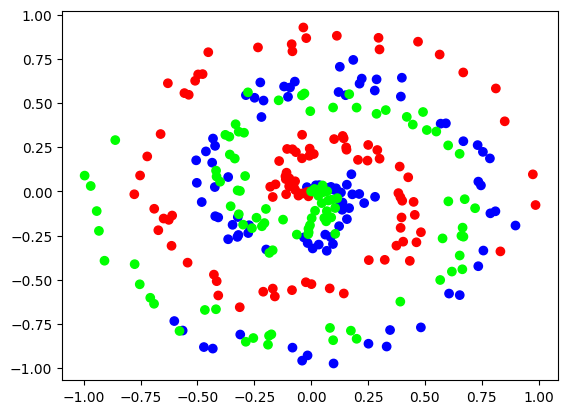

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Realiza un *forward pass* de los datos de entrada ```X``` en la red definida en el ejercicio anterior.

In [ ]:
# SOL EJ 10

import nnfs
import numpy as np

# Set seed for reproducibility. Keep this!
nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)

dense1.forward(X)

print(dense1.output)



[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.97437393e-05  3.68895635e-05  8.37819971e-05]
 [ 1.46999708e-04  9.15808050e-05  1.40212578e-04]
 [ 2.07372344e-04  1.30936343e-04  5.65641167e-05]
 [ 2.86790368e-04  1.80765084e-04  1.03854705e-04]
 [ 2.19341367e-04  1.33933267e-04  4.29269276e-04]
 [ 4.57232818e-04  2.86837865e-04  2.75570346e-04]
 [ 5.04495576e-04  3.13935801e-04  5.10764425e-04]
 [ 5.98006591e-04  3.73010378e-04  5.33751328e-04]
 [ 6.83097576e-04  4.28781728e-04  3.91351059e-04]
 [ 7.61973730e-04  4.78020811e-04  4.58543567e-04]
 [ 5.49420714e-04  3.51005961e-04 -1.82106392e-04]
 [ 7.50892970e-04  4.75986686e-04  5.35191502e-05]
 [ 9.18770384e-04  5.79523272e-04  2.98788887e-04]
 [ 8.48342432e-04  5.38380118e-04  1.01766127e-05]
 [ 8.75700905e-04  5.56468556e-04 -4.83128715e-05]
 [ 2.25684140e-04  1.54440801e-04 -9.05890192e-04]
 [ 1.04701158e-03  6.64075662e-04  4.37535418e-05]
 [ 7.48425606e-04  4.81276220e-04 -5.01867733e-04]
 [ 1.26718660e-03  8.01315648e-

## Ejercicio 11: Función de activación ReLU

Programa una clase llamada ```Activation_ReLU``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación ReLU a los inputs pasados como argumento.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=relu.png&t=reweQCjpTXGOQZ4&scalingup=0" width="350"/>
</div>
</center>


In [ ]:
# SOL EJ 11

class Activation_ReLU:

    def forward(self, inputs):
      self.output = np.maximum(0, inputs)

## Ejercicio 12: Función de activación ```Softmax```
El objetivo de este ejercicio es llegar a una clase llamada ```Activation_Softmax``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación Softmax a los inputs pasados como argumento. En teoría la función Softmax se formula como

$$
S_{i, j}=\frac{e^{z_{i, j}}}{\sum_{l=1}^L e^{z_{i, l}}}
$$
siendo los $z_j$ el output de la neurona $j$ (y por tanto, input de la función de activación). El índice $i$ hace referencia a la observación $i$ considerada.

Para conseguir una implementación robusta, haremos alguna modificación en la formulación anterior. Siguie el siguiente proceso:


 - **12.a** Dada una única observación ```layer_outputs = [4.8, 1.21, 2.385]``` (se supone salida de una capa), aplica la función Softmax anterior (de momento, no es necesario que programes ninguna clase).

In [ ]:
# SOL EJ 12a
layer_output = np.array([4.8, 1.21, 2.385])

np.exp(layer_output)/np.sum(np.exp(layer_output))

array([0.89528266, 0.02470831, 0.08000903])

 - **12.b** Dados los siguientes datos en lote, aplica la función Softmax a cada observación.

In [ ]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                            [8.9, -1.81, 0.2],
                            [1.41, 1.051, 0.026]])

In [ ]:
# SOL EJ 12b
np.exp(layer_outputs)/np.sum(np.exp(layer_outputs), axis=1, keepdims=True)

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

 - **12.c** En el proceso de exponenciación anterior, resta al input considerado el máximo valor de dicha observación. Esto pretende evitar que los valores se disparen al exponenciar (*exloding values*).


In [ ]:
# SOL EJ 12c
exp_values = np.exp(layer_outputs-np.max(inputs, axis=1, keepdims=True))
exp_values/np.sum(exp_values, axis=1, keepdims=True)

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

 - **12.d** Encapsula el código anterior en una clase ```Activation_Softmax``` que implemente únicamente un método: ```forward(self, inputs)```

In [ ]:
# SOL EJ 12d

class Activation_Softmax:

    def forward(self, inputs):
      exp_values = np.exp(inputs-np.max(inputs, axis=1, keepdims=True)) # detalle de implementación
      self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

## Ejercicio 13: *Forward pass* de una red con funciones de activación

Dado un conjunto de datos de entrada $X$, construye una red neuronal que conste de dos capas densas y funciones de activación ReLU y Softmax. El objetivo es realizar un *forward pass* a través de esta red. Los datos de entrada corresponde con los presentados en el ejercicio 10:

In [ ]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

La arquitectura de la red debe ser:
 - Input de dos features (las coordenadas de los puntos)
 - Hidden layer, con entrada de 2 valores y salida de 3. Función de activación ReLU.
 - Capa de salida, con entrada de 3 valores y salida también de 3 valores (correspondientes a las tres categorías del problema de clasificación). Función de activación Softmax.

Realiza un forward pass de los datos hasta la última función (softmax) e imprime por pantalla el output para las 5 primeras observaciones. Reutiliza las clases implementadas en ejercicios anteriores.

In [ ]:
# SOL EJ 13

dense_layer1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense_layer2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense_layer1.forward(X)
activation1.forward(dense1.output)

dense_layer2.forward(activation1.output)
activation2.forward(dense_layer2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333325 0.33333337 0.33333334]
 [0.3333332  0.33333343 0.33333334]
 [0.33333316 0.3333334  0.33333343]
 [0.33333308 0.33333343 0.33333346]]


## Ejercicio 14: Función de pérdidas — entropía cruzada. Caso particular

Imagina que estamos tratando de clasificar entre las categorías "perro", "gato" o "humano". Un perro es la clase 0 (en el índice 0), un gato la clase 1 (índice 1) y un humano la clase 2 (índice 2). Supongamos que tenemos una arquitectura como la del ejercicio anterior y que tenemos un batch de tres observaciones, que han dado lugar a los siguientes valores de salida en la última capa:

In [ ]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])


Recuerda que estos valroes representan la confianza del modelo en cada clase, para cada observación. Disponemos también de las etiquetas (valores objetivo) para estas tres observaciones: son un perro, un gato y un gato:

In [ ]:
class_targets = [0, 1, 1] # perro, gato, gato

La fórmula para calcular la entropía cruzada categórica de *y* (distribución real/deseada) e *y-hat* (distribución predicha) es:
$$
L_i=-\sum_j y_{i, j} \log \left(\hat{y}_{i, j}\right)
$$
donde $L_i$ indica el valor de pérdida de la muestra, $i$ es la muestra $i$-ésima del conjunto, $j$ es la hace referencia al valor $j$-ésimo en la salida, $y$ son los valores objetivo (conocidos de antemano) e $\hat{y}$ son los valores predichos (salida de la red).

Calcula la entropía cruzada categórica para cada observación del batch anterior, así como una media para todo el batch.

In [ ]:
# SOL EJ 14
for targ_indx, distribution in zip(class_targets, softmax_outputs):
  print(distribution[targ_indx])

0.7
0.5
0.9


In [ ]:
softmax_outputs[[0,1,2], class_targets]

array([0.7, 0.5, 0.9])

In [ ]:
softmax_outputs[range(len(softmax_outputs)), class_targets]

array([0.7, 0.5, 0.9])

## Ejercicio 15: Función de pérdidas — entropía cruzada usando POO

Observa la siguiente clase abstracta:

In [ ]:
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
         - output: output of the last layer of the network
         - y: ground truth
        """
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

 - **15.a** A partir del ejercicio 14, implementa una clase llamada ```Loss_CategoricalCrossentropy``` que herede de la clase abstracta anterior e implemente el método ```forward```, para el caso de una función de pérdida tipo entropía cruzada categórica.

In [ ]:
# SOL EJ 15a - Implementation of the Categorical Cross-Entropy Loss Function as a class

class Loss_CategoricalCrossentropy(Loss):
    # Defining the forward method for the Categorical Cross-Entropy Loss

    def forward(self, output, y):
        # 'output' is the predicted probabilities by the network, 'y' is the true labels
        # 'output' shape: (number of samples, number of classes)

        sample = len(output)  # Number of samples in the input

        # To avoid numerical instability, clip values of 'output' to be within a specific range
        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)  # Clipping values to (1e-7, 1-1e-7)

        # Extracting the confidences of the correct predictions based on 'y' (true labels)
        # 'y_pred_clipped[range(len(y_pred_clipped)), y]' retrieves the predicted probabilities
        # for the correct classes corresponding to the true labels 'y'
        correct_confidences = y_pred_clipped[range(len(y_pred_clipped)), y]

        # Calculating the negative logarithm of the correct confidences to compute loss
        negative_log_props = -np.log(correct_confidences)

        # Returning the computed negative log probabilities as the loss
        return negative_log_props



 - **15.b** Repite el *forward pass* del ejercicio 13, pero incluye el cálculo final de la función de pérdidas usando la implementación anterior

In [ ]:
# SOL EJ 15b - Implementing a Forward Pass in a Neural Network

# Importing necessary function 'spiral_data' from 'nnfs.datasets'
from nnfs.datasets import spiral_data

# Generating synthetic data (X: features, y: labels) using 'spiral_data' function
X, y = spiral_data(samples=100, classes=3)

# Creating a dense layer with 2 input features and 3 output features
dense_layer1 = Layer_Dense(2, 3)
# Initializing ReLU activation function
activation1 = Activation_ReLU()

# Creating another dense layer with 3 input features and 3 output features
dense_layer2 = Layer_Dense(3, 3)
# Initializing Softmax activation function
activation2 = Activation_Softmax()

# Forward pass through the first dense layer with input data X
dense_layer1.forward(X)
# Forward pass through the ReLU activation function using the output of the first dense layer
activation1.forward(dense_layer1.output)

# Forward pass through the second dense layer using the output of the ReLU activation function
dense_layer2.forward(activation1.output)
# Forward pass through the Softmax activation function using the output of the second dense layer
activation2.forward(dense_layer2.output)

# Initializing the Categorical Cross-Entropy loss function
loss_value = Loss_CategoricalCrossentropy()

# Calculating and printing the loss value using the output of the Softmax activation and true labels y
print(loss_value.forward(activation2.output, y))

# Alternative method for calculating and printing the loss value using the loss function's 'calculate' method
print(loss_value.calculate(activation2.output, y))


[1.0986123 1.0986124 1.0986134 1.098613  1.0986125 1.0986141 1.0986154
 1.0986161 1.0986168 1.0986156 1.098618  1.0986181 1.098618  1.0986192
 1.0986186 1.0986204 1.0986207 1.098621  1.0986221 1.0986125 1.0986204
 1.0986123 1.0986168 1.098614  1.0986252 1.098623  1.0986123 1.0986125
 1.0986123 1.0986123 1.0986149 1.0986123 1.098614  1.0986123 1.0986123
 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123
 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123
 1.0986123 1.0986123 1.0986123 1.0986117 1.0986122 1.0986118 1.0986123
 1.0986149 1.0986174 1.0986295 1.0986123 1.0986117 1.0986279 1.0986216
 1.0986422 1.0986123 1.0986224 1.0986491 1.0986497 1.0986508 1.0986464
 1.0986317 1.0986469 1.0986491 1.0986521 1.0986474 1.0986538 1.0986533
 1.0986558 1.0986491 1.0986366 1.0986284 1.0986556 1.098622  1.0986578
 1.0986595 1.0986123 1.0986267 1.0986123 1.0986123 1.0986123 1.0986123
 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123
 1.098

 - **15.c** Aunque la pérdida es una métrica útil para optimizar un modelo, hay otra métrica que se suele utilizar en la práctica junto con la pérdida: la *precisión*, que describe con qué frecuencia la mayor confianza corresponde a la clase correcta. Añade al código del apartado 'b' el cálculo de la precisión.

In [ ]:
# SOL EJ 15c - Implementing Forward Pass and Accuracy Calculation in a Neural Network

# Generating synthetic data (X: features, y: labels) using 'spiral_data' function
X, y = spiral_data(samples=100, classes=3)

# Creating a dense layer with 2 input features and 3 output features
dense_layer1 = Layer_Dense(2, 3)
# Initializing ReLU activation function
activation1 = Activation_ReLU()

# Creating another dense layer with 3 input features and 3 output features
dense_layer2 = Layer_Dense(3, 3)
# Initializing Softmax activation function
activation2 = Activation_Softmax()

# Forward pass through the first dense layer with input data X
dense_layer1.forward(X)
# Forward pass through the ReLU activation function using the output of the first dense layer
activation1.forward(dense_layer1.output)

# Forward pass through the second dense layer using the output of the ReLU activation function
dense_layer2.forward(activation1.output)
# Forward pass through the Softmax activation function using the output of the second dense layer
activation2.forward(dense_layer2.output)

# Initializing the Categorical Cross-Entropy loss function
loss_value = Loss_CategoricalCrossentropy()

# Calculating and printing the loss value using the output of the Softmax activation and true labels y
print(loss_value.forward(activation2.output, y))

# Alternative method for calculating and printing the loss value using the loss function's 'calculate' method
print(loss_value.calculate(activation2.output, y))

# Calculating the predicted classes by selecting the index with the highest probability
predictions = np.argmax(activation2.output, axis=1)
# Calculating accuracy by comparing predicted classes with true labels and finding the mean
accuracy = np.mean(predictions == y)
# Printing the accuracy
print(f"accuracy: {accuracy}")


[1.0986123 1.0986123 1.0986125 1.0986129 1.0986131 1.0986128 1.0986133
 1.0986125 1.0986135 1.0986135 1.0986135 1.0986143 1.0986143 1.0986149
 1.0986154 1.0986147 1.0986154 1.0986123 1.0986159 1.0986156 1.0986155
 1.0986131 1.0986147 1.0986156 1.0986168 1.0986142 1.0986123 1.0986152
 1.0986123 1.0986123 1.0986123 1.0986142 1.0986123 1.0986147 1.0986123
 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123
 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123
 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123
 1.0986123 1.0986137 1.0986123 1.0986123 1.0986123 1.0986168 1.0986216
 1.0986128 1.098619  1.0986187 1.0986136 1.0986217 1.0986232 1.0986247
 1.098623  1.0986257 1.09862   1.0986257 1.0986282 1.0986278 1.098628
 1.0986288 1.0986284 1.0986284 1.0986264 1.0986279 1.0986277 1.0986252
 1.0986298 1.0986123 1.098622  1.0986123 1.0986261 1.0986257 1.0986145
 1.0986283 1.0986123 1.0986123 1.0986123 1.0986123 1.0986123 1.0986137
 1.0986

## Ejercicio 16: Optimización — modificación aleatoria de pesos (I)

Observa los siguientes datos de entrenamiento, que también definen un problema de clasificación multiclase, pero de una naturaleza más sencilla que el de la triple espiral visto hasta ahora

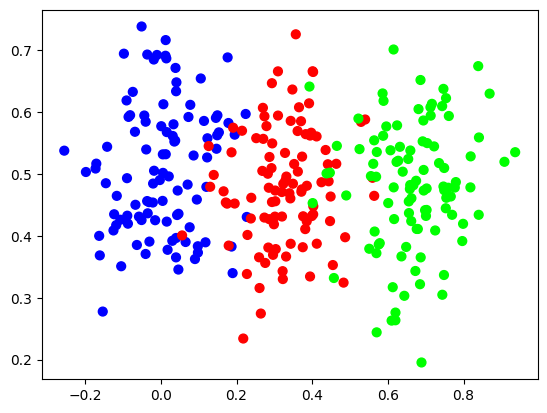

In [ ]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()



Utilizando la estructura computacional del ejercicio anterior, realiza un proceso iterativo (máximo 10000 iteraciones) en el que se vayan cambiando los pesos y sesgos de ambas capas de forma aleatoria (distribución normal de media 0 y varianza 0.05). Almacena el resultado que dé lugar a una menor pérdida. Comenta el decrecimiento de la función de pérdidas durante el proceso.

In [ ]:
# Setting an initial minimum loss value to a high number
min_loss = 100000

# Creating layers and activations for the neural network
dense_layer1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense_layer2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Looping for a certain number of iterations
for i in range(10000):
    # Forward pass through the network layers
    dense_layer1.forward(X)
    activation1.forward(dense_layer1.output)

    dense_layer2.forward(activation1.output)
    activation2.forward(dense_layer2.output)

    # Calculating the loss
    loss_value = Loss_CategoricalCrossentropy()
    loss = loss_value.calculate(activation2.output, y)

    # Checking if the current loss is smaller than the minimum recorded loss
    if loss < min_loss:
        min_loss = loss
        print(f"loss: {loss}")

    # Reinitializing weights and biases randomly
    dense_layer1.weights = np.random.normal(0, np.sqrt(0.05), (2, 3))
    dense_layer1.biases = np.random.normal(0, np.sqrt(0.05), (3,))
    dense_layer2.weights = np.random.normal(0, np.sqrt(0.05), (3, 3))
    dense_layer1.biases = np.random.normal(0, np.sqrt(0.05), (3,))




loss: 1.0986100435256958
loss: 1.0920902490615845
loss: 1.0909643173217773
loss: 1.0839605331420898
loss: 1.0838934183120728
loss: 1.0691395998001099
loss: 1.0554085969924927
loss: 1.0448997020721436


## Ejercicio 17: Optimización — modificación aleatoria de pesos (II)

 - **17.a** Repite el ejercicio anterior con un enfoque ligeramente distinto: en lugar de fijar nuevos parámetros elegios al azar en cada iteración, suma una fracción aleatoria (distribución normal de media 0 y varianza 0.05) a los parámetros actuales y comprueba si esos nuevos valores dan lugar a una pérdida menor. Comenta si este enfoque funciona mejor o peor que el anterior.


In [ ]:
# SOL EJ 17a

# Initializing nnfs (Neural Network From Scratch) library
nnfs.init()

# Generating synthetic data using vertical_data function
X, y = vertical_data(samples=100, classes=3)

# Initializing variables for tracking minimum loss and defining layers and activations
min_loss = 100000
dense_layer1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense_layer2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Initializing the loss function
loss_function = Loss_CategoricalCrossentropy()

# Looping for a certain number of iterations
for i in range(10000):
    # Forward pass through the first dense layer and ReLU activation
    dense_layer1.forward(X)
    activation1.forward(dense_layer1.output)

    # Forward pass through the second dense layer and Softmax activation
    dense_layer2.forward(activation1.output)
    activation2.forward(dense_layer2.output)

    # Calculating the loss
    loss = loss_function.calculate(activation2.output, y)

    # Checking if the current loss is smaller than the minimum recorded loss
    if loss < min_loss:
        min_loss = loss
        print(f"loss: {loss}")

    # Adding random values to weights and biases to perform simple stochastic gradient descent
    dense_layer1.weights += np.random.normal(0, np.sqrt(0.05), (2, 3))
    dense_layer1.biases += np.random.normal(0, np.sqrt(0.05), (3,))
    dense_layer2.weights += np.random.normal(0, np.sqrt(0.05), (3, 3))
    dense_layer2.biases += np.random.normal(0, np.sqrt(0.05), (3,))


loss: 1.0986100435256958
loss: 1.0868345499038696
loss: 1.0866016149520874
loss: 1.0646814107894897
loss: 0.9773081541061401


 - **17.b** Prueba también este enfoque con los datos de la triple espiral.

In [ ]:
# SOL EJ 17b
# Initializing nnfs (Neural Network From Scratch) library
nnfs.init()

# Generating synthetic data using spiral_data function
X, y = spiral_data(samples=100, classes=3)

# Initializing variables for tracking minimum loss and defining layers and activations
min_loss = 100000
dense_layer1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense_layer2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Initializing the loss function
loss_function = Loss_CategoricalCrossentropy()

# Looping for a certain number of iterations
for i in range(10000):
    # Forward pass through the first dense layer and ReLU activation
    dense_layer1.forward(X)
    activation1.forward(dense_layer1.output)

    # Forward pass through the second dense layer and Softmax activation
    dense_layer2.forward(activation1.output)
    activation2.forward(dense_layer2.output)

    # Calculating the loss
    loss = loss_function.calculate(activation2.output, y)

    # Checking if the current loss is smaller than the minimum recorded loss
    if loss < min_loss:
        min_loss = loss
        print(f"loss: {loss}")

    # Adding random values to weights and biases to perform simple stochastic gradient descent
    dense_layer1.weights += np.random.normal(0, np.sqrt(0.05), (2, 3))
    dense_layer1.biases += np.random.normal(0, np.sqrt(0.05), (3,))
    dense_layer2.weights += np.random.normal(0, np.sqrt(0.05), (3, 3))
    dense_layer2.biases += np.random.normal(0, np.sqrt(0.05), (3,))


loss: 1.0986113548278809


## Ejercicio 18: Introducción a la *backpropagation*

La siguiente imagen corresponde a una simple neurona + f. activación, con 3 inputs. Los valores de inputs, pesos y sesgo se han fijado aleatoriamente. En la imagen también se indica en rojo el valor del gradiente recibido de una capa posterior (en este ejemplo, $1$):

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple_gradiente.png&t=nJHrGFJQ8VVuZK7&scalingup=0" width="500"/>
</div>
</center>

Pensemos en esta neurona como una gran función, cuyas variables independientes o parámetros de entrada son los inputs, pesos y sesgo. Esta gran función consiste en varias funciones más simples: hay una multiplicación de inputs y pesos, suma de estos valores y el sesgo, así como una la función activación ReLU - 3 funciones encadenadas en total:
$$
\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)
$$
Para calcular cómo afecta cada variable al resultado, debemos calcular sus derivadas parciales. Como hay varias funciones combinadas, debemos aplicar la regla de la cadena.

Calcula cómo impacta en **el input $x_0$** el gradiente recibido, es decir:

$$
\begin{aligned}
& \frac{\partial}{\partial x_0}\left[\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)\right]
\end{aligned}
$$

In [ ]:
# SOL EJ 18
def relu_derivative(input):
    return 1.0 if input > 0 else 0.0

# Input data, weights, and bias
x = np.array([1, -2, 3])
w = np.array([-3, -1, 2])
b = 1

# Creating an instance of the ReLU activation function
act_fun = Activation_ReLU()

# Calculating the weighted sum of inputs and weights plus bias
z = np.dot(x, w) + b

# Applying the ReLU activation function to the calculated sum
act_fun.forward(z)
print(act_fun.output)  # Output after ReLU activation

# Setting the derivative of the subsequent layer with respect to its output
dvalue = 1.0

# Calculating the derivative of ReLU with respect to the input
drelu = dvalue * relu_derivative(z)

# Calculating the outer product of the derivatives and input data for backpropagation
np.outer(drelu, x)


6.0


array([[ 1., -2.,  3.]])

## Ejercicio 19: Capa densa con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 9, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass (excluyendo la función de activación). El parámetro ```dvalues``` es una matriz donde cada fila se refiere a una observación del batch, y cada elemento de dicha fila es el gradiente llegado de aguas abajo. Dicho método debe calcular los valores ```self.dweights```, ```self.dbiases``` y ```self.dinputs``` que recogen las distintas derivadas parciales para cada parámetro. Presta atención a las dimensiones.

In [ ]:
# SOL EJ 19

import numpy as np

class Layer_Dense:

    def __init__(self, n_inputs, n_neuronas):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neuronas)
        self.biases = np.zeros((1, n_neuronas))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):

        self.dweights = np.dot(self.inputs.T, dvalues)

        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        self.dinputs = np.dot(dvalues, self.weights.T)

## Ejercicio 20: ReLU con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 11, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.

In [ ]:
# SOL EJ 20
class Activation_ReLU:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()

        self.dinputs[self.inputs <= 0] = 0

## Ejercicio 21: Función de pérdidas con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 15, incluyendo un nuevo método llamado ```backward(self, dvalues, y_true)``` que implemente el backward pass. El parámetro ```dvalues``` son los valores predichos ($\hat{y}_{i,j}$) y ```y_true``` son los valores objetivo. El método debe calcular los valores ```self.dinputs```, el vector derivada respecto a los inputs. Ten en cuenta lo siguiente:
 - Debes convertir los ```y_true``` en *one-hot* vectors.
 - Una vez calcules la derivada según el desarrollo teórico, normaliza el resultado. Esto evitará problemas con muestras grandes en pasos posteriores. Simplemente divide el resultado final por la longitud de la muestra (```len(dvalues)```)

In [ ]:
# SOL EJ 21
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):
    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
        - output: output of the last layer of the network
        - y: ground truth
        """
        # Compute individual sample losses and then their mean
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

    @abstractmethod
    def backward(self, dvalues, y):
        pass

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, output, y):
        # Number of samples
        samples = len(output)

        # Clip predicted values to avoid log(0) issues
        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)

        # Extract confidences for correct classes
        correct_confidences = y_pred_clipped[range(samples), y]

        # Calculate negative log probabilities
        negative_log_probs = -np.log(correct_confidences)
        return negative_log_probs

    def backward(self, dvalues, y):
        # Number of samples
        samples = len(dvalues)

        # Initialize gradient array as zeros
        self.dinputs = np.zeros_like(dvalues)

        # Calculate gradients for correct class indices
        self.dinputs[range(samples), y] = -1 / dvalues[range(samples), y]

        # Average gradient over the batch of samples
        self.dinputs = self.dinputs / samples


## Ejercicio 22: SoftMax con *backpropagation*

Se pretende extender la implementación que hiciste en el ejercicio 12, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.
 - **22a.** Comienza calculando un caso particular. Supón que la salida de la función Softmax ha sido ```softmax_output = [0.7, 0.1, 0.2]```. El resultado debe ser una matriz (el Jacobiano) de dimensión $3x3$.

In [ ]:
# SOL 22a
softmax_output = np.array([[0.7, 0.1, 0.2]])  # Given softmax output probabilities
class_targets = np.array([1, 0, 0])  # True class targets

# Create an instance of Loss_CategoricalCrossentropy
loss = Loss_CategoricalCrossentropy()

# Calculate gradients of the loss with respect to the softmax output
loss.backward(softmax_output, class_targets)
dvalues = loss.dinputs  # Get the calculated gradients

def softmax_backward(dvalues, y_pred):
    # Initialize an empty Jacobian matrix
    jacobian_matrix = []

    # For each observation and class
    for i in range(len(dvalues)):
        # Reshape softmax predictions to perform computations
        s = y_pred[i].reshape(-1, 1)

        # Compute Jacobian matrix of the softmax function
        jacobian = np.diagflat(s) - np.dot(s, s.T)
        jacobian_matrix.append(jacobian)

    return np.array(jacobian_matrix)

# Get the Jacobian matrix using the calculated gradients and softmax outputs
jacobian_matrix = softmax_backward(dvalues, softmax_output)

print(jacobian_matrix)


[[[ 0.20999999 -0.07       -0.14      ]
  [-0.07        0.09       -0.02      ]
  [-0.14       -0.02        0.16      ]]]


 - **22b.** Generaliza el código anterior. Extiende la clase del ejercicio 12 con el método llamado ```backward(self, dvalues)```. A continuación se incluye una plantilla de desarrollo que debe ser completada. Recuerda copiar el resto de métodos de la clase.

In [ ]:
# SOL 22b

class Activation_Softmax:
    def forward(self, inputs):
        # Exponential values of the inputs shifted for numerical stability
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Calculating softmax outputs for each sample
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def backward(self, dvalues):
        # Create an uninitialized array to store the gradients
        self.dinputs = np.empty_like(dvalues)

        # Enumerate through outputs and corresponding gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Reshaping the output to a column vector
            single_output = single_output.reshape(-1, 1)

            # Calculate Jacobian matrix of the softmax output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            # Calculate the gradient by multiplying the Jacobian matrix and the incoming gradient
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)



## Ejercicio 23: Softmax + entropía cruzada

Al calcular juntas las derivadas de la función Softmax y la función de pérdidas de entropía cruzada categórica, los cáluclos se simplifican notablemente. Implementa el método que hace el *backward pass* (i.e. ```backward(self, dvalues, y_true)```) de nueva clase llamada ```Activation_Softmax_Loss_CategoricalCrossentropy``` (el resto de métodos se dan ya implementados). Recuerda normalizar el resultado dividiéndolo por el número de muestras (```len(dvalues)```) para evitar problemas en pasos futuros.

In [ ]:
# SOL EJ 23
class Activation_Softmax_Loss_CategoricalCrossentropy:

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)

        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, y_hat, y_true):
        samples = len(y_hat)

        self.dinputs = y_hat.copy()

        # softmax_outputs = np.array([[0.7, 0.1, 0.2],
        #                             [0.1, 0.5, 0.4],
        #                             [0.02, 0.9, 0.08]])

        self.dinputs[range(samples), y_true] -= 1

        # Normalization -> "valores explosivos"
        self.dinputs = self.dinputs / samples

## Ejercicio 24: Comprobación Softmax + entropía cruzada

Se pretende comprobar si el *backpropagation* combinado (Softmax + entropía cruzada) devuelve los mismos valores en comparación con cuando retropropagamos gradientes a través de ambas funciones por separado. Para este ejemplo, vamos a crear una salida de la función Softmax y algunos valores objetivo. Retropropágalos utilizando ambas soluciones, y comprueba que obtienes los mismos resultados

In [ ]:
# SOL EJ 24
import numpy as np
import nnfs

nnfs.init()

softmax_outputs = np.array([[0.7, 0.1, 0.2,],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

class_targets = np.array([0, 1, 1])

loss1 = Activation_Softmax_Loss_CategoricalCrossentropy()
loss1.backward(softmax_outputs, class_targets)
print(loss1.dinputs)

loss2 = Loss_CategoricalCrossentropy()
loss2.backward(softmax_outputs, class_targets)
act = Activation_Softmax()
act.output = softmax_outputs
act.backward(loss2.dinputs)
print(act.dinputs)


[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
[[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]


## Ejercicio 25: *Backward pass* de toda la red

Realiza un *backward pass* de la red que usaste en el ejercicio *15b*.

In [ ]:
# SOL EJ 25
nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y)

#print(loss)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

print(dense1.dweights)

[[ 1.5766357e-04  7.8368583e-05  4.7324400e-05]
 [ 1.8161038e-04  1.1045573e-05 -3.3096312e-05]]


## Ejercicio 26: Optimizador — Descenso del gradiente

Programa una clase llamada ```Optimizer_SGD``` que implemente el optimizador de descenso de gradiente. Pasa a su constructor un parámetro ```learning_rate``` por defecto de $1$. Dicha clase deberá contener un único método llamado ```update_params(layer)``` al que se le pase una capa y aplique sus correspondientes gradientes a la actualización de sus parámetros.

In [ ]:
# SOL EJ 26
class Optimizer_SGD:

    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

## Ejercicio 27: Optimización sobre el caso de la triple espiral

Partiendo del código al que llegaste en el ejercicio 25, añade un optimizador que actualice los parámetros de la red. Realiza 10000 iteraciones (*epoch*). Observa como evoluciona la precisión y las pérdidas a lo largo del entrenamiento.

epoch: 0   loss: 1.098594307899475
epoch: 1   loss: 1.0985743999481201
epoch: 2   loss: 1.098556399345398
epoch: 3   loss: 1.0985409021377563
epoch: 4   loss: 1.098527431488037
epoch: 5   loss: 1.098514437675476
epoch: 6   loss: 1.0985021591186523
epoch: 7   loss: 1.0984902381896973
epoch: 8   loss: 1.098477840423584
epoch: 9   loss: 1.0984655618667603
epoch: 10   loss: 1.0984524488449097
epoch: 11   loss: 1.0984398126602173
epoch: 12   loss: 1.0984269380569458
epoch: 13   loss: 1.0984135866165161
epoch: 14   loss: 1.0983996391296387
epoch: 15   loss: 1.098384976387024
epoch: 16   loss: 1.0983697175979614
epoch: 17   loss: 1.098353624343872
epoch: 18   loss: 1.098337173461914
epoch: 19   loss: 1.09831964969635
epoch: 20   loss: 1.0983012914657593
epoch: 21   loss: 1.0982822179794312
epoch: 22   loss: 1.0982623100280762
epoch: 23   loss: 1.0982412099838257
epoch: 24   loss: 1.098219633102417
epoch: 25   loss: 1.098197102546692
epoch: 26   loss: 1.0981736183166504
epoch: 27   loss: 1.098

epoch: 429   loss: 1.073503017425537
epoch: 430   loss: 1.0734755992889404
epoch: 431   loss: 1.0734487771987915
epoch: 432   loss: 1.0734221935272217
epoch: 433   loss: 1.0733953714370728
epoch: 434   loss: 1.0733681917190552
epoch: 435   loss: 1.0733404159545898
epoch: 436   loss: 1.0733132362365723
epoch: 437   loss: 1.0732868909835815
epoch: 438   loss: 1.073258876800537
epoch: 439   loss: 1.0732311010360718
epoch: 440   loss: 1.0732022523880005
epoch: 441   loss: 1.0731738805770874
epoch: 442   loss: 1.0731459856033325
epoch: 443   loss: 1.073117733001709
epoch: 444   loss: 1.073089361190796
epoch: 445   loss: 1.0730607509613037
epoch: 446   loss: 1.0730314254760742
epoch: 447   loss: 1.0730030536651611
epoch: 448   loss: 1.072974681854248
epoch: 449   loss: 1.0729464292526245
epoch: 450   loss: 1.0729165077209473
epoch: 451   loss: 1.0728871822357178
epoch: 452   loss: 1.0728589296340942
epoch: 453   loss: 1.0728293657302856
epoch: 454   loss: 1.0727990865707397
epoch: 455   loss

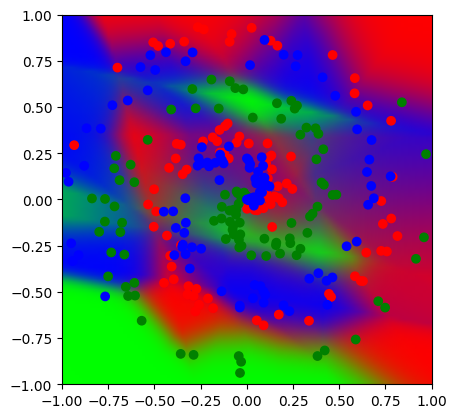

In [ ]:
#SOL 27

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Creo el optimizador
optimizer = Optimizer_SGD()

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    print(f"epoch: {epoch}   loss: {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


#Este código a continuación te ayudará a visualizar los resultados de la red (asegúrate que el la lista 'model' contiene los mismo nombres para las distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

# Ejercicio 28: Misma solución utilizando ```keras```

Busca documentación sobre cómo implementar redes neuronales con el módulo ```tf.keras``` (echa un vistazo por ejemplo a [este enlace](https://stackoverflow.com/questions/64689483/how-to-do-multiclass-classification-with-keras), o [este otro](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)). Crear una arquitectura similar a la usada en el ejercicio anterior, directamente usando las herramientas disponibles en dicho paquete.

In [ ]:
%pip install -q tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# SOL EJ 28
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

# Assuming 'spiral_data' is a function that generates synthetic data
nnfs.init()
X, y = spiral_data(samples=100, classes=3)

# Creating a Sequential model
model = Sequential()

# Adding a Dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Adding a Dense output layer with 3 units (for 3 classes) and softmax activation
model.add(Dense(3, activation='softmax'))

# Compiling the model using stochastic gradient descent optimizer and sparse categorical cross-entropy loss
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model on the generated data for 100 epochs
model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100


10/10 [==============================] - 0s 2ms/step - loss: 1.1034 - accuracy: 0.2900
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1026 - accuracy: 0.3033
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 1.1018 - accuracy: 0.3167
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 1.1010 - accuracy: 0.3167
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1002 - accuracy: 0.3267
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0994 - accuracy: 0.3200
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3400
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0979 - accuracy: 0.3533
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0973 - accuracy: 0.3667
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0965 - accuracy: 0.3700
Epoch 11/100
10/10 [=

## Ejercicio 29: *Learning rate decay*

 - **29.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 26 para que incluya un mecanismo que aplique el decaimiento de la tasa de aprendizaje. Ahora, además del argumento ```learning_rate```, el constructor de la clase recibirá el ```decay```. En dicho constructor, inicializa también dos variables adicionales: ```self.current_learning_rate``` (para ir almacenando el *learning rate* en sucesivas iteraciones) y ```self.iterations``` (para ir almacenando el número de iteraciones). Actualiza el método ```update_params``` e implementa dos nuevos métodos:
   - ```pre_update_params(self)```: responsable de actualizar ```self.current_learning_rate```. Está pensado para será ejecutado justo antes de la llamada a ```update_params```.
   - ```post_update_params(self)```: responsable de actualizar ```self.iterations```. Está pensado para será ejecutado justo después de la llamada a ```update_params```.


In [ ]:
# SOL EJ 29a

class Optimizer_SGD:

    def __init__(self, learning_rate=1.0, decay=0.0):
        self.learning_rate = learning_rate
        self.decay = decay
        self.current_learning_rate = learning_rate
        self.iterations = 0

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    def post_update_params(self):
        self.iterations += 1


  - **29.b** Partiendo del código al que llegaste en el ejercicio 27, prueba el mecanismo de *Learning rate decay* que acabas de implementar. Experimenta con un *decay* de $10^{-2}$ y de $10^{-3}$ ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 27? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoch: 1   loss: 1.0985743999481201
epoch: 2   loss: 1.098556399345398
epoch: 3   loss: 1.098541021347046
epoch: 4   loss: 1.098527431488037
epoch: 5   loss: 1.0985145568847656
epoch: 6   loss: 1.0985023975372314
epoch: 7   loss: 1.0984903573989868
epoch: 8   loss: 1.0984781980514526
epoch: 9   loss: 1.0984660387039185
epoch: 10   loss: 1.0984530448913574
epoch: 11   loss: 1.098440408706665
epoch: 12   loss: 1.0984277725219727
epoch: 13   loss: 1.098414659500122
epoch: 14   loss: 1.0984008312225342
epoch: 15   loss: 1.0983866453170776
epoch: 16   loss: 1.0983716249465942
epoch: 17   loss: 1.098356008529663
epoch: 18   loss: 1.0983397960662842
epoch: 19   loss: 1.0983227491378784
epoch: 20   loss: 1.0983048677444458
epoch: 21   loss: 1.0982863903045654
epoch: 22   loss: 1.0982669591903687
epoch: 23   loss: 1.098246455192566
epoch: 24   loss: 1.098225474357605
epoch: 25   loss: 1.0982038974761963
epoch: 26   loss: 1.098181128501892
epoch: 27   loss: 1.098157525062561
epoch: 28   loss: 1.

epoch: 71   loss: 1.0947743654251099
epoch: 72   loss: 1.0946096181869507
epoch: 73   loss: 1.0944392681121826
epoch: 74   loss: 1.0942639112472534
epoch: 75   loss: 1.0940834283828735
epoch: 76   loss: 1.0938977003097534
epoch: 77   loss: 1.093706488609314
epoch: 78   loss: 1.0935101509094238
epoch: 79   loss: 1.093308687210083
epoch: 80   loss: 1.093101978302002
epoch: 81   loss: 1.0928902626037598
epoch: 82   loss: 1.0926729440689087
epoch: 83   loss: 1.0924513339996338
epoch: 84   loss: 1.0922249555587769
epoch: 85   loss: 1.0919948816299438
epoch: 86   loss: 1.0917606353759766
epoch: 87   loss: 1.0915225744247437
epoch: 88   loss: 1.0912811756134033
epoch: 89   loss: 1.0910362005233765
epoch: 90   loss: 1.090788722038269
epoch: 91   loss: 1.0905381441116333
epoch: 92   loss: 1.0902843475341797
epoch: 93   loss: 1.0900282859802246
epoch: 94   loss: 1.0897705554962158
epoch: 95   loss: 1.089511513710022
epoch: 96   loss: 1.0892510414123535
epoch: 97   loss: 1.0889896154403687
epoch:

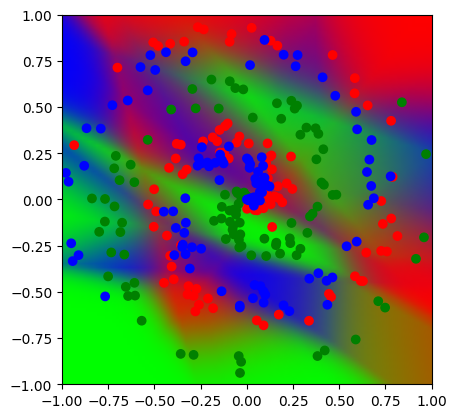

In [ ]:
# SOL EJ 29b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Creo el optimizador
optimizer = Optimizer_SGD(decay=1e-3)

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    if epoch % 100:
        print(f"epoch: {epoch}   loss: {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

#Implementa aquí la red neuronal

#Este código a continuación te ayudará a visualizar los resultados de la red (asegúrate que el la lista 'model' contiene los mismo nombres para las distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 30: Descenso de gradiente con momentum

 - **30.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 29 para que incluya el mecanismo de *momentum*. Sigue la siguiente plantilla de desarrollo:

In [ ]:
# SOL EJ 30a

# SGD optimizer con momentum
class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):

        # If we use momentum, create momentum arrays if they don't exist. Initialized at zeros
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Compute weight and bias updates with momentum
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Compute weight and bias updates without momentum
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases using either vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1

  - **30.b** Partiendo del código al que llegaste en el ejercicio 29, prueba el mecanismo de momentum que acabas de implementar. Probar con un *decay* de $10^{-3}$ y un *momentum* de $0.5$ y luego de $0.9$. ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 29? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoch: 0   loss: 1.098594307899475


epoch: 100   loss: 1.0534671545028687
epoch: 200   loss: 0.9551739692687988
epoch: 300   loss: 0.7628453373908997
epoch: 400   loss: 0.7322490215301514
epoch: 500   loss: 0.6663029789924622
epoch: 600   loss: 0.5637745261192322
epoch: 700   loss: 0.5129256248474121
epoch: 800   loss: 0.6036384105682373
epoch: 900   loss: 0.4415970742702484
epoch: 1000   loss: 0.44723835587501526
epoch: 1100   loss: 0.5344828367233276
epoch: 1200   loss: 0.38977304100990295
epoch: 1300   loss: 0.3607647120952606
epoch: 1400   loss: 0.41145092248916626
epoch: 1500   loss: 0.3946501612663269
epoch: 1600   loss: 0.31101807951927185
epoch: 1700   loss: 0.3008284568786621
epoch: 1800   loss: 0.4825432300567627
epoch: 1900   loss: 0.30999353528022766
epoch: 2000   loss: 0.28176403045654297
epoch: 2100   loss: 0.26234668493270874
epoch: 2200   loss: 0.2491002380847931
epoch: 2300   loss: 0.23801814019680023
epoch: 2400   loss: 0.22945286333560944
epoch: 2500   loss: 0.2216673493385315
epoch: 2600   loss: 0.213

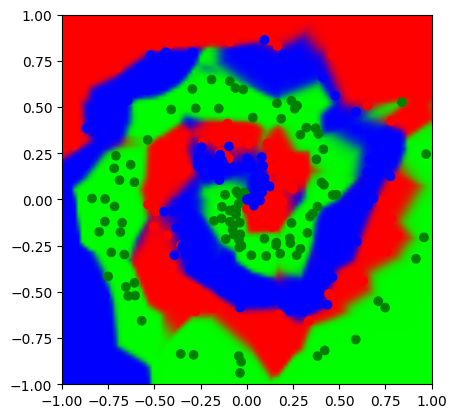

In [ ]:
# SOL EJ 30b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Creo el optimizador
optimizer = Optimizer_SGD(decay=1e-3, momentum = 0.9)

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    if epoch % 100 == 0:
        print(f"epoch: {epoch}   loss: {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

#Este código a continuación te ayudará a visualizar los resultados de la red (asegúrate que el la lista 'model' contiene los mismo nombres para las distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)


## Ejercicio 31: RMS Prop

 - **31.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_RMSprop``` que implemente este optimizador. RMSProp utiliza una media móvil de la caché:

    ```python
    cache = rho * cache + (1 - rho) * gradient ** 2
    ```

    Que luego se usará en la actualización de cada parámetro individual como:

    ```python
    parm_updates = learning_rate * parm_gradient / (sqrt(cache) + eps)
    ```
    Sigue la siguiente plantilla de desarrollo:

In [ ]:
# SOL EJ 31a

# RMSprop with momentum
class Optimizer_RMSprop:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        # Initialize optimizer settings
        self.learning_rate = learning_rate  # Initial learning rate
        self.current_learning_rate = learning_rate  # Current learning rate (adjusted for decay)
        self.decay = decay  # Learning rate decay
        self.iterations = 0  # Iteration count
        self.epsilon = epsilon  # Small value to prevent division by zero
        self.rho = rho  # RMSprop decay parameter

    def pre_update_params(self):
        # Update the current learning rate with decay
        self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        # If cache arrays don't exist, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients (RMSprop)
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights ** 2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases ** 2

        # Update weights and biases using RMSprop with momentum
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache + self.epsilon))
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache + self.epsilon))

    def post_update_params(self):
        # Increment iteration count after updating parameters
        self.iterations += 1


epoch: 0   loss: 1.098594307899475
epoch: 100   loss: 1.0575755834579468
epoch: 200   loss: 0.9993463158607483
epoch: 300   loss: 0.9512028098106384
epoch: 400   loss: 0.9274330735206604
epoch: 500   loss: 0.8962534666061401
epoch: 600   loss: 0.884117841720581
epoch: 700   loss: 0.868486762046814
epoch: 800   loss: 0.8599814772605896
epoch: 900   loss: 0.8510422706604004
epoch: 1000   loss: 0.8451848030090332
epoch: 1100   loss: 0.8404473662376404
epoch: 1200   loss: 0.8378680944442749
epoch: 1300   loss: 0.8319782018661499
epoch: 1400   loss: 0.8286452293395996
epoch: 1500   loss: 0.82474285364151
epoch: 1600   loss: 0.8235282301902771
epoch: 1700   loss: 0.8209566473960876
epoch: 1800   loss: 0.8191972374916077
epoch: 1900   loss: 0.8200995326042175
epoch: 2000   loss: 0.8171142339706421
epoch: 2100   loss: 0.8141178488731384
epoch: 2200   loss: 0.8129496574401855
epoch: 2300   loss: 0.8139286041259766
epoch: 2400   loss: 0.8104169964790344
epoch: 2500   loss: 0.8097747564315796
epo

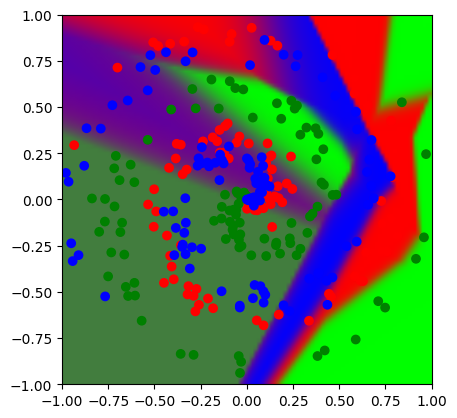

In [ ]:
# Initialize neural network framework
nnfs.init()

# Prepare the spiral dataset
X, y = spiral_data(samples=100, classes=3)

# Define the layers and activations for the neural network
dense1 = Layer_Dense(2, 64)  # Input layer to a hidden layer with 64 units
activation1 = Activation_ReLU()  # Activation function for the hidden layer

dense2 = Layer_Dense(64, 3)  # Hidden layer to output layer with 3 units for classification
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()  # Activation for loss computation

# Create the RMSprop optimizer
optimizer = Optimizer_RMSprop(decay=1e-5, rho=0.999, learning_rate=0.02)

# Training loop
for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)

    # Compute the loss
    loss = loss_activation.forward(dense2.output, y)

    # Print loss periodically
    if epoch % 100 == 0:
        print(f"epoch: {epoch}   loss: {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update optimizer parameters
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

# Visualization of the model's performance on the spiral dataset
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

In [ ]:
# SOL EJ 31a

# RMSprop with momentum
class Optimizer_RMSprop:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        # Initialize optimizer settings
        self.learning_rate = learning_rate  # Initial learning rate
        self.current_learning_rate = learning_rate  # Current learning rate (adjusted for decay)
        self.decay = decay  # Learning rate decay
        self.iterations = 0  # Iteration count
        self.epsilon = epsilon  # Small value to prevent division by zero
        self.rho = rho  # RMSprop decay parameter

    def pre_update_params(self):
        # Update the current learning rate with decay
        self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        # If cache arrays don't exist, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients (RMSprop)
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights ** 2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases ** 2

        # Update weights and biases using RMSprop with momentum
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        # Increment iteration count after updating parameters
        self.iterations += 1



  - **31.b** Partiendo del código al que llegaste en el ejercicio 30, prueba el optimizador que acabas de implementar. Prueba primero con un *decay* de $10^{-4}$ y el resto de parámetros por defecto. Prueba luego con ```learning_rate=0.02, decay=1e-5, rho=0.999``` ¿Se consigue mejorar los resultados en comparación con los del ejercicio 30? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoch: 0   loss: 1.098594307899475
epoch: 100   loss: 1.0134366750717163
epoch: 200   loss: 0.9601768255233765
epoch: 300   loss: 0.9031939506530762
epoch: 400   loss: 0.8426470160484314
epoch: 500   loss: 0.8019272685050964
epoch: 600   loss: 0.7642881274223328
epoch: 700   loss: 0.7534891366958618
epoch: 800   loss: 0.8307912349700928
epoch: 900   loss: 0.788240909576416
epoch: 1000   loss: 0.6372529864311218
epoch: 1100   loss: 0.6118232011795044
epoch: 1200   loss: 0.5557571649551392
epoch: 1300   loss: 0.5589865446090698
epoch: 1400   loss: 0.5458976030349731
epoch: 1500   loss: 0.5661225318908691
epoch: 1600   loss: 0.5369582176208496
epoch: 1700   loss: 0.4805288314819336
epoch: 1800   loss: 0.48022302985191345
epoch: 1900   loss: 0.4636763036251068
epoch: 2000   loss: 0.46712154150009155
epoch: 2100   loss: 0.4668104946613312
epoch: 2200   loss: 0.4382455050945282
epoch: 2300   loss: 0.43903759121894836
epoch: 2400   loss: 0.4252225160598755
epoch: 2500   loss: 0.41919887065887

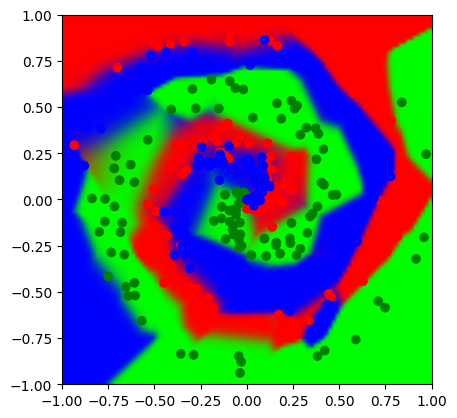

In [ ]:
# Initialize neural network framework
nnfs.init()

# Prepare the spiral dataset
X, y = spiral_data(samples=100, classes=3)

# Define the layers and activations for the neural network
dense1 = Layer_Dense(2, 64)  # Input layer to a hidden layer with 64 units
activation1 = Activation_ReLU()  # Activation function for the hidden layer

dense2 = Layer_Dense(64, 3)  # Hidden layer to output layer with 3 units for classification
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()  # Activation for loss computation

# Create the RMSprop optimizer
optimizer = Optimizer_RMSprop(decay=1e-5, rho=0.999, learning_rate=0.02)

# Training loop
for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)

    # Compute the loss
    loss = loss_activation.forward(dense2.output, y)

    # Print loss periodically
    if epoch % 100 == 0:
        print(f"epoch: {epoch}   loss: {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update optimizer parameters
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

# Visualization of the model's performance on the spiral dataset
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

# In this case, the result isn't improved, but it's very likely that the previous algorithm is overfitting the training data.

## Ejercicio 32: Adam

 - **32.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_Adam``` que implemente este optimizador. Adam añade a RMSProp el mecanismo de momentum ($\beta_1$). También añade además un mecanismo de corrección de sesgo, dividiendo tanto el momentum como el caché por $1-\beta_1^{step}$.

In [ ]:
# SOL EJ 32a

# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        # Initialize optimizer settings
        self.learning_rate = learning_rate  # Initial learning rate
        self.current_learning_rate = learning_rate  # Current learning rate
        self.decay = decay  # Learning rate decay over time
        self.iterations = 0  # Iteration counter
        self.epsilon = epsilon  # Small value to prevent division by zero
        self.beta_1 = beta_1  # Exponential decay rate for the first moment estimates
        self.beta_2 = beta_2  # Exponential decay rate for the second moment estimates

    def pre_update_params(self):
        # Update current learning rate with decay
        self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights ** 2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases ** 2

        # Get corrected momentum and cache
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1**(self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1**(self.iterations + 1))
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2**(self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2**(self.iterations + 1))

        # Vanilla SGD parameter update + normalization with square-rooted cache
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (
                    np.sqrt(weight_cache_corrected + self.epsilon))
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (
                    np.sqrt(bias_cache_corrected + self.epsilon))

    def post_update_params(self):
        # Increment iteration counter after parameter update
        self.iterations += 1


  - **32.b** Partiendo del código al que llegaste en el ejercicio 31, prueba el optimizador que acabas de implementar. Prueba primero con ```Optimizer_Adam(learning_rate=0.02, decay=1e-5)```, y luego con ```Optimizer_Adam(learning_rate=0.05, decay=5e-7)```. ¿Se consigue mejorar los resultados en comparación con los del ejercicio 31? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoch: 0   loss: 1.098594307899475
epoch: 100   loss: 0.5570108294487
epoch: 200   loss: 0.41202688217163086
epoch: 300   loss: 0.3429836928844452
epoch: 400   loss: 0.2748447060585022
epoch: 500   loss: 0.24261118471622467
epoch: 600   loss: 0.22361135482788086
epoch: 700   loss: 0.20748749375343323
epoch: 800   loss: 0.1944803148508072
epoch: 900   loss: 0.18040810525417328
epoch: 1000   loss: 0.1703520119190216
epoch: 1100   loss: 0.1612166315317154
epoch: 1200   loss: 0.15365880727767944
epoch: 1300   loss: 0.147475004196167
epoch: 1400   loss: 0.14172367751598358
epoch: 1500   loss: 0.13656368851661682
epoch: 1600   loss: 0.13146479427814484
epoch: 1700   loss: 0.12775474786758423
epoch: 1800   loss: 0.12440931051969528
epoch: 1900   loss: 0.12157643586397171
epoch: 2000   loss: 0.11881029605865479
epoch: 2100   loss: 0.1165485754609108
epoch: 2200   loss: 0.1143593117594719
epoch: 2300   loss: 0.11216924339532852
epoch: 2400   loss: 0.1100526675581932
epoch: 2500   loss: 0.108366

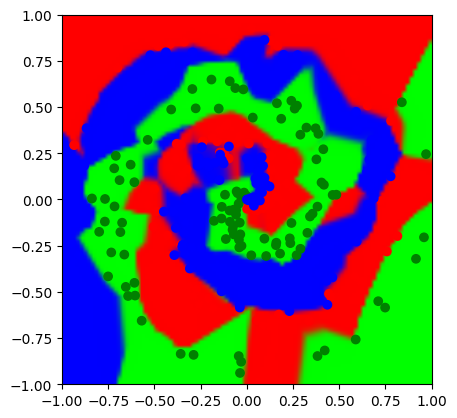

In [ ]:
# SOL EJ 32b
# Initialize nnfs and prepare spiral data
nnfs.init()
X, y = spiral_data(samples=100, classes=3)

# Create the first dense layer with 2 input features and 64 neurons
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()  # Apply ReLU activation function

# Create the second dense layer with 64 input neurons and 3 output neurons
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create an instance of the Adam optimizer with specified parameters
optimizer = Optimizer_Adam(decay=5e-7, learning_rate=0.05)

# Loop through training epochs
for epoch in range(10000):
    dense1.forward(X)  # Perform forward pass through the first dense layer
    activation1.forward(dense1.output)  # Apply ReLU activation function

    dense2.forward(activation1.output)  # Perform forward pass through the second dense layer
    loss = loss_activation.forward(dense2.output, y)  # Calculate loss

    # Print loss at intervals
    if epoch % 100 == 0:
        print(f"epoch: {epoch}   loss: {loss}")

    # Backward pass - calculate gradients
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update parameters using the Adam optimizer
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

# Visualize the results of the trained model
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

# Note: The previous algorithm may be overfitting the training data. Training with fewer epochs could prevent overfitting.


 - **32.c** Interpreta los resultados que acabas de obtener. ¿Crees que la red ha aprendido correctamente la naturaleza de los datos de entrenamiento? Si no es así, investiga qué puede estar pasando y discute posibles soluciones (no es necesario implementar nada).

# SOL EJ 32c

Los resultados muestran un progreso consistente en la reducción de la pérdida durante el entrenamiento, aunque nos encontramos con la posibilidad de overfitting.

Para abordar el overfitting, podemos considerar varías opciones:

- Regularización: Implementar técnicas como Dropout o regularización L1/L2 para reducir el sobreajuste.

- Ajuste de hiperparámetros: Explorar diferentes valores para la tasa de aprendizaje u otros hiperparámetros relevantes para mejorar el rendimiento del modelo.

- Estabilización numérica: Normalizar los datos de entrada o aplicar técnicas para estabilizar los cálculos numéricos durante el entrenamiento.
